# Text preprocessing
This assignment is to give hands on experience in text pre processing

## 1. Write commands to import nltk

In [ ]:
import nltk

For this assignment, use the file "sherlock.txt" Load the file and print it

In [ ]:
# code for calling text file

#Im gonna load them from my gdrive, efficient to run code to import than
#manually import every runtime.

from google.colab import drive
drive.mount("/content/drive")

!ls "/content/drive/MyDrive/oko/dseAsn2/Text/"

with open('/content/drive/MyDrive/oko/dseAsn2/Text/sherlock.txt', 'r') as sherlock:
  text = sherlock.read()
print(text)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
sherlock.txt
A SCANDAL IN BOHEMIA

I

 


To Sherlock Holmes she is always the woman. I have seldom heard him mention her under any other name. In his eyes she eclipses and predominates the whole of her sex. It was not that he felt any emotion akin to love for Irene Adler. All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. He was, I take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. He never spoke of the softer passions, save with a gibe and a sneer. They were admirable things for the observer--excellent for drawing the veil from men's motives and actions. But for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which migh

check the length of the file and print first 500 characters

In [ ]:
# Total characters in sherlock.txt
print(len(text))

46433


In [ ]:
# First 500 characters in sherlock
print(text[:500])

A SCANDAL IN BOHEMIA

I

 


To Sherlock Holmes she is always the woman. I have seldom heard him mention her under any other name. In his eyes she eclipses and predominates the whole of her sex. It was not that he felt any emotion akin to love for Irene Adler. All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. He was, I take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed hims


## 2. Sentence Tokenization

Perform sentence tokenization and show the results

In [ ]:
#Sentence Tokenization – Splitting sentences
nltk.download('punkt') #pre-trained and widely used for this purpose
sentencesOld = nltk.sent_tokenize(text) #using the punkt tokenizer to split text
#into indiv sentences, stored as list of strings

print(sentencesOld[:5])
#hmm the results are interesting, the title and first sentence and the newlines
#in b/w are all in one.

#More Pre-processing time

import re

# Step 1: Remove titles and sections if they follow a predictable format
# Remove standalone titles like "A SCANDAL IN BOHEMIA" by finding uppercase lines.
text = re.sub(r'^[A-Z\s]+\n+', '', text, flags=re.MULTILINE)

# Step 2: Remove extra newlines (collapse multiple newlines into a single one)
text = re.sub(r'\n+', '\n', text).strip()

# Step 3: Tokenize sentences
sentences = nltk.sent_tokenize(text)

# Show the first few sentences to verify
sentences[:5]
#better

['A SCANDAL IN BOHEMIA\n\nI\n\n \n\n\nTo Sherlock Holmes she is always the woman.', 'I have seldom heard him mention her under any other name.', 'In his eyes she eclipses and predominates the whole of her sex.', 'It was not that he felt any emotion akin to love for Irene Adler.', 'All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['To Sherlock Holmes she is always the woman.',
 'I have seldom heard him mention her under any other name.',
 'In his eyes she eclipses and predominates the whole of her sex.',
 'It was not that he felt any emotion akin to love for Irene Adler.',
 'All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind.']

## 3. Normalize the Text

Text includes a lot of punctuation, which we need to remove if we want to work only with the actual words.

Write a snippet to remove all the numerals and punctuation from the text and convert the words to lower case.

In [ ]:
# remove numeric digits
text_no_digits = re.sub(r'\d+', '', text)
text_no_digits[:500]

# remove punctuation and make lower case
import string
text_normalized = text_no_digits.translate(str.maketrans('', '', string.punctuation)).lower()

#using string lib to call make translation table, to make replacements
#(none in this case) and also deleting all punctuation using string.punctuation
#also making strings lower case

# print the normalized text
print(text_normalized)

to sherlock holmes she is always the woman i have seldom heard him mention her under any other name in his eyes she eclipses and predominates the whole of her sex it was not that he felt any emotion akin to love for irene adler all emotions and that one particularly were abhorrent to his cold precise but admirably balanced mind he was i take it the most perfect reasoning and observing machine that the world has seen but as a lover he would have placed himself in a false position he never spoke of the softer passions save with a gibe and a sneer they were admirable things for the observerexcellent for drawing the veil from mens motives and actions but for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results grit in a sensitive instrument or a crack in one of his own highpower lenses would not be more disturbing than a strong emotion in a nature such 

## 4. Word Tokenization

Perform word tokenization and show the results

['to', 'sherlock', 'holmes', 'she', 'is', 'always', 'the', 'woman', 'i', 'have']


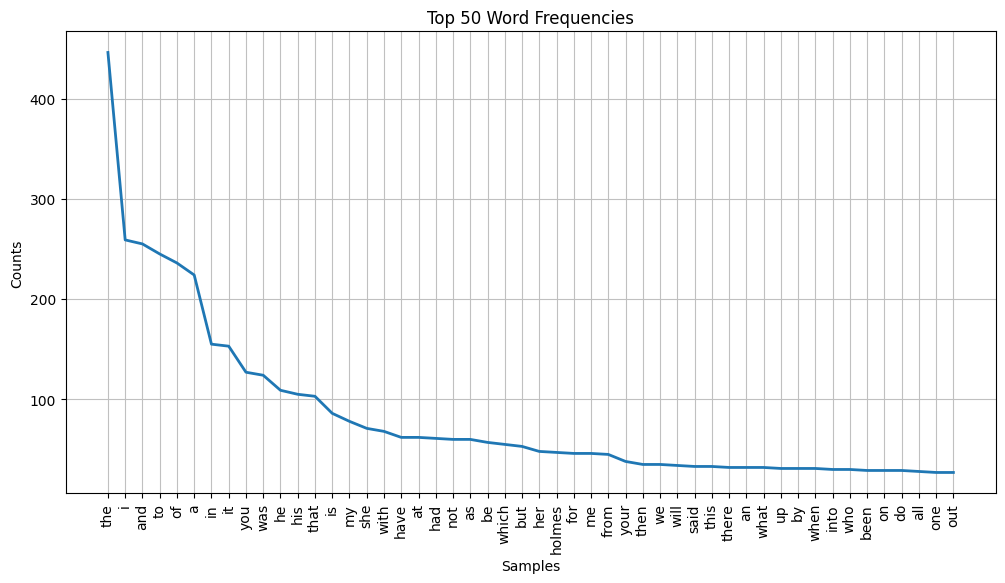

In [ ]:
# Tokenize the text into individual words
words = nltk.word_tokenize(text_normalized)
print(words[:10])

# Get the frequency distribution of the words
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

fdist = FreqDist(words)


# Display the frequency distribution as a histogram (top 50 words)

plt.figure(figsize=(12, 6))  # Set figure size (width, height) in inches
fdist.plot(50, title='Top 50 Word Frequencies')

plt.show()

## 5. Remove Stopwords
You can see that a large number of the words in the text are common words like "the" or "and". These are called  "stopwords" and  add little in the way of semantic meaning to the text and won't help to determine the subject matter

Write a snippet to remove stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


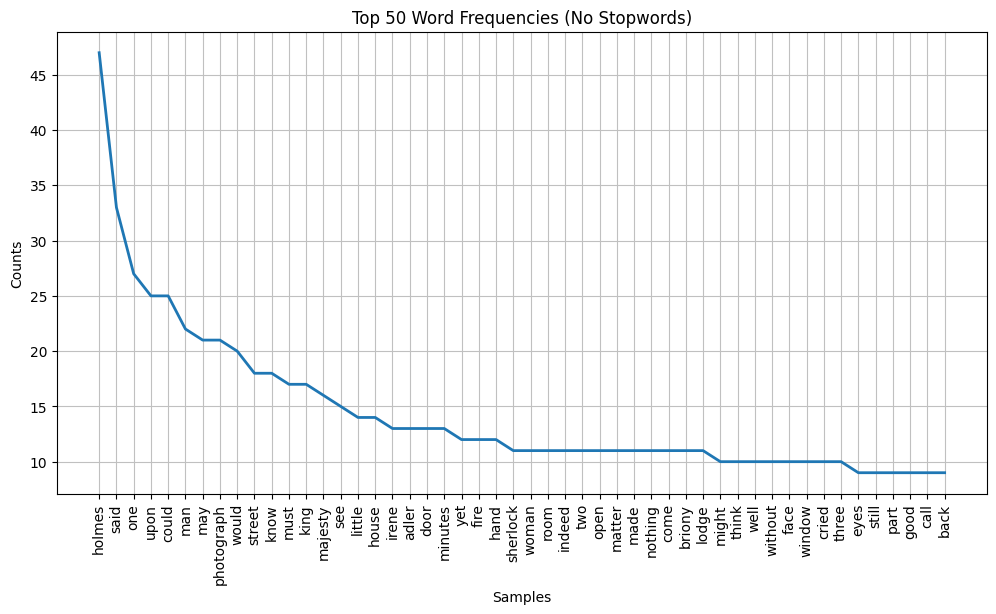

<Axes: title={'center': 'Top 50 Word Frequencies (No Stopwords)'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# remove stopwords from the text
nltk.download('stopwords')
from nltk.corpus import stopwords #getting that stopwords set

stop_words = set(stopwords.words('english')) #for english, get stopwrods in our
# word set
filtered_words = [word for word in words if word not in stop_words]
# add every word thats not same as any element in  the stop_words set, from our
# word set
# Get the frequency distribution of the remaining words

fdist_filtered = FreqDist(filtered_words)

# Plot the frequency of the top 50 words
plt.figure(figsize=(12, 6))  # Set figure size (width, height) in inches
fdist_filtered.plot(50, title='Top 50 Word Frequencies (No Stopwords)')

# hmm "said, upon, could, may, would, know, must, see, yet, indeed, open, matter"
# and others are debatable if they are stopwrds or not

## 6. Extract Bigrams

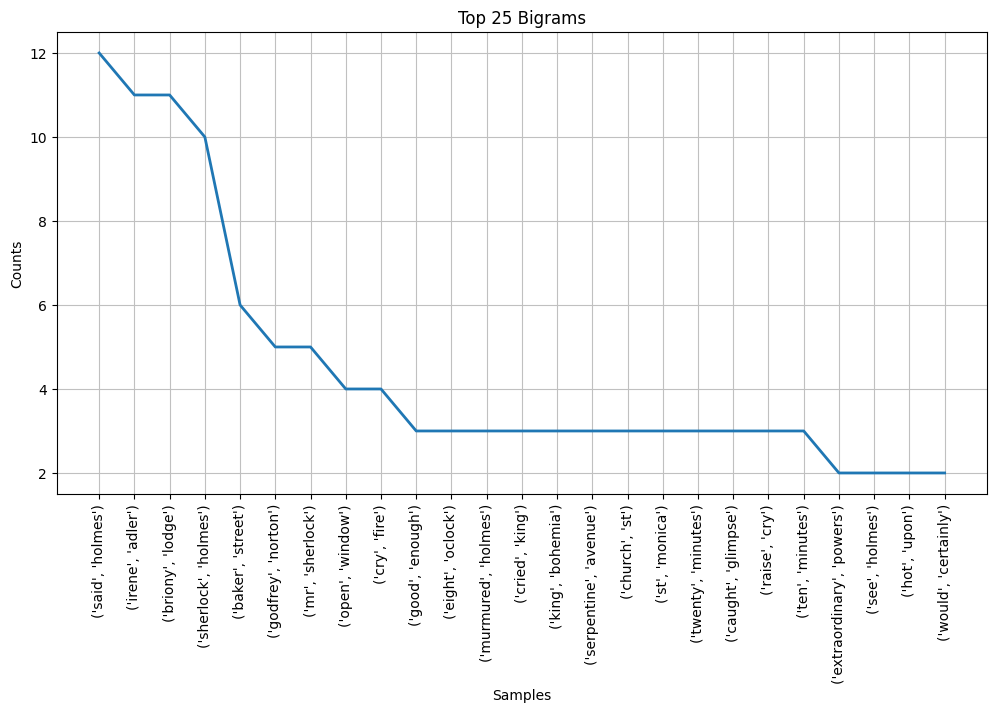

<Axes: title={'center': 'Top 25 Bigrams'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# Get n-grams where n = 2
from nltk import bigrams

bigrams_list = list(bigrams(filtered_words))


# Count the frequency of each n-gram
fdist_bigrams = FreqDist(bigrams_list)

# Plot the frequency of the top 25 bigrams
plt.figure(figsize=(12, 6))  # Set figure size (width, height) in inches
fdist_bigrams.plot(25, title='Top 25 Bigrams')

#expected results, Holmes says things which Watson writes down, and this
# story is heavily involving Irene Adler so she's also in top rankings
# Domain Knowledge

## 7. Stem the words

Write a code to stem the words and count the stems

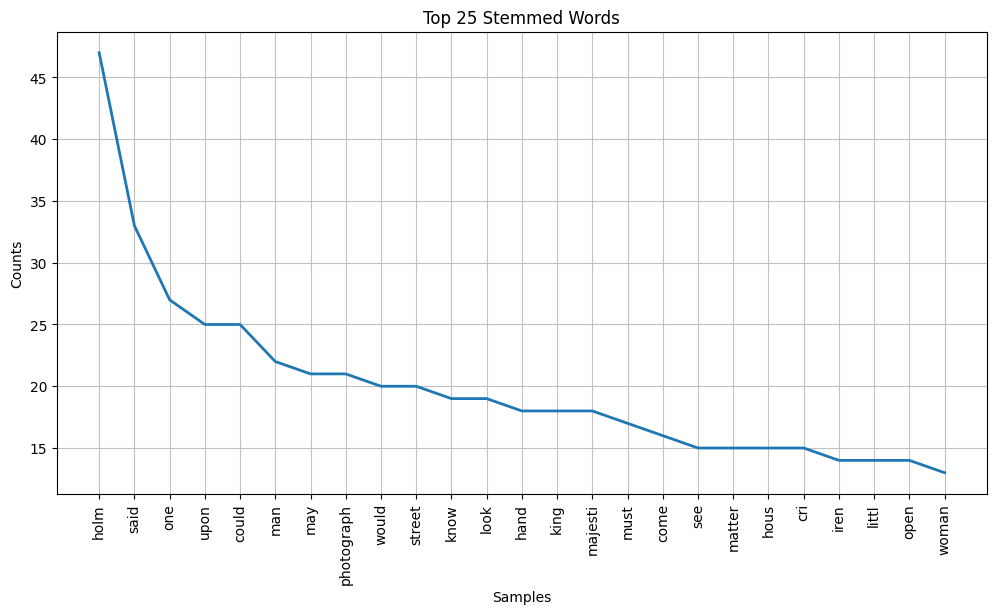

<Axes: title={'center': 'Top 25 Stemmed Words'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# Get the word stems
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
#Porter Stemmer is one of the most commonly used stemming algorithms.
#Developed by Martin Porter in 1980 and follows a series of rules to iteratively
#strip suffixes from words. Although it often produces non-standard root forms,
#it’s popular because it’s fast and reduces words to a consistent base form.
stemmed_words = [stemmer.stem(word) for word in filtered_words]

# Get Frequency distribution
fdist_stemmed = FreqDist(stemmed_words)

# Plot the frequency of the top 25 stem words

plt.figure(figsize=(12, 6))  # Set figure size (width, height) in inches
fdist_stemmed.plot(25, title='Top 25 Stemmed Words')

#peculiar stemmings here: holm, majesti, cri, iren, littl

## 8. Lemmatize the Words

Write a code to lemmatize the words and count the lemmas

[nltk_data] Downloading package wordnet to /root/nltk_data...


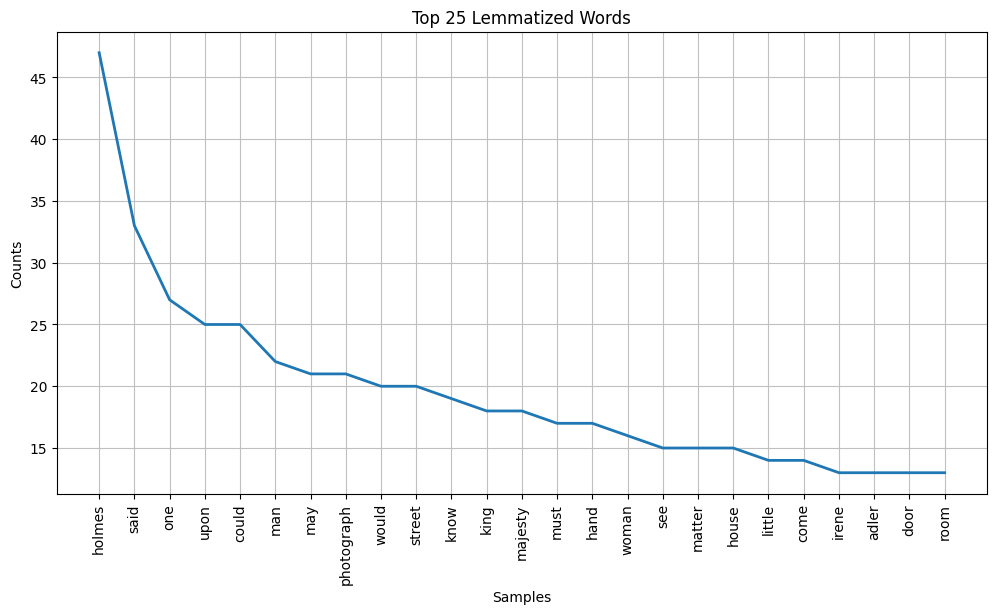

<Axes: title={'center': 'Top 25 Lemmatized Words'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# Get the word lemmas
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
# a lemmatizer provided by NLTH that uses WordNet, a large lexical database
# of English, to perform lemmatization.

# Get Frequency distribution

fdist_lemmatized = FreqDist(lemmatized_words)

# Plot the frequency of the top 25 lemma words
plt.figure(figsize=(12, 6))  # Set figure size (width, height) in inches
fdist_lemmatized.plot(25, title='Top 25 Lemmatized Words')